# First exploration of Kaggle big five personality data

In [72]:
import pandas as pd
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../raw/data_final_rekeyed.tsv.gz", delimiter="\t", nrows=10)
df.head()

,Unnamed: 0,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,1,3.0,1.0,3.0,2.0,3.0,3.0,2.0,1.0,1.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.7060
2,2,2.0,3.0,4.0,2.0,3.0,4.0,1.0,3.0,2.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,3,2.0,4.0,2.0,3.0,4.0,4.0,2.0,2.0,1.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.7500,-1.2500
4,4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,1.0,3.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0000,38.0000


In [75]:
indices = list()

personality_cats = ["extraversion", "neuroticism", "agreeableness", "conscientiousness", "openness"]

category = list()
for i in range(0,50): 
    gothrough = i % 10
    set_of_questions = i // 10
    question_index = 1 + gothrough * 5 + set_of_questions
    indices.append(question_index)
    category.append(personality_cats[set_of_questions])
    # print(f"index {question_index} got {gothrough} set {set_of_questions}")
print(category)

['extraversion', 'extraversion', 'extraversion', 'extraversion', 'extraversion', 'extraversion', 'extraversion', 'extraversion', 'extraversion', 'extraversion', 'neuroticism', 'neuroticism', 'neuroticism', 'neuroticism', 'neuroticism', 'neuroticism', 'neuroticism', 'neuroticism', 'neuroticism', 'neuroticism', 'agreeableness', 'agreeableness', 'agreeableness', 'agreeableness', 'agreeableness', 'agreeableness', 'agreeableness', 'agreeableness', 'agreeableness', 'agreeableness', 'conscientiousness', 'conscientiousness', 'conscientiousness', 'conscientiousness', 'conscientiousness', 'conscientiousness', 'conscientiousness', 'conscientiousness', 'conscientiousness', 'conscientiousness', 'openness', 'openness', 'openness', 'openness', 'openness', 'openness', 'openness', 'openness', 'openness', 'openness']


In [60]:
question_names = list(df.columns)[1:51]
question_times = list(df.columns)[51:101]

design = pd.DataFrame({
    "question_name":question_names, 
    "question_time":question_times, 
    "category":category,
    "order":indices})
design

design.to_csv("../raw/design.tsv", sep="\t")

# Initial visuals

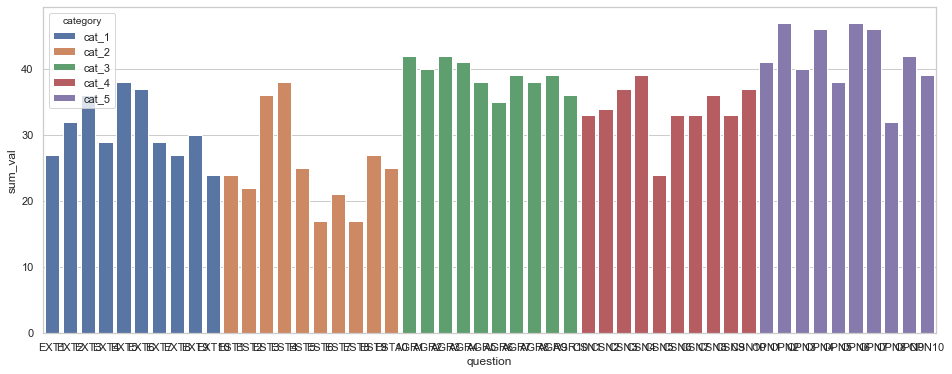

In [73]:
sns.set(style="whitegrid")

df.head()

type(design.question_name)
list(design.question_name)

df.columns

summed_questions = pd.DataFrame(df[design.question_name].sum(), columns=["sum_val"])
summed_questions['question'] = summed_questions.index.values
summed_questions['category'] = list(design.category)
summed_questions
#summed_questions.index = ["question", "summed_val"]

#print(summed_questions.index)
#summed_questions.head()

plt.figure(figsize=(16,6))
sns.barplot(x="question", y="sum_val", hue="category", data=summed_questions, dodge=False)